# Lecture 05의 데모

### Lecture 05의 데모에 대한 코드

참고자료: 

https://github.com/data-8/materials-sp22/blob/main/lec/lec06.ipynb

https://github.com/data-8/materials-sp22/blob/main/lec/lec07.ipynb

In [1]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/lec

Mounted at /content/gdrive
/content/gdrive/MyDrive/ITEC419-fa22/lec


In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## **Census**

In [3]:
full = Table.read_table('nc-est2019-agesex-res.csv')

In [4]:
# Keep only the columns we care about
partial = full.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')

In [6]:
# Make things easier to read
simple = partial.relabeled(2, '2014').relabeled(3, '2019')
simple

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


## **Line Plots**

In [7]:
no_999=simple.where('AGE',are.below(999))
no_999

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323
0,5,4004576,4028281
0,6,4133372,4017227
0,7,4152666,4022319
0,8,4118349,4066194
0,9,4106068,4061874


999번째 행 빼고 나머지만 가져오기

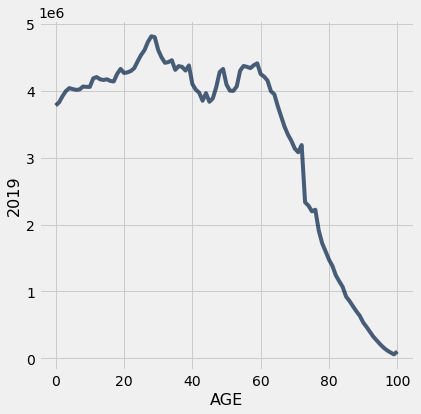

In [8]:
overall=no_999.where('SEX',0).drop('SEX')
overall.plot('AGE','2019')

SEX가 0인 것만 뽑이서 

plot -> x축은 나이

100살 이상은 전부 100에 넣어뒀으므로 100에서 높아지는 것처럼 보임

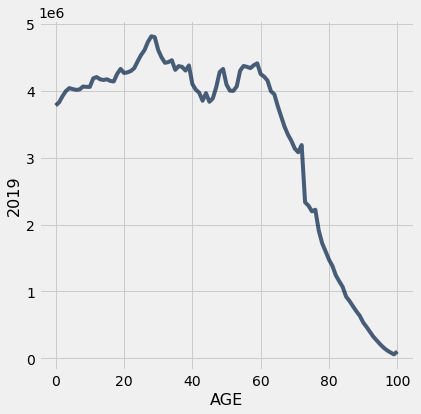

In [9]:
#US Population
overall.plot('AGE','2019')

US Population


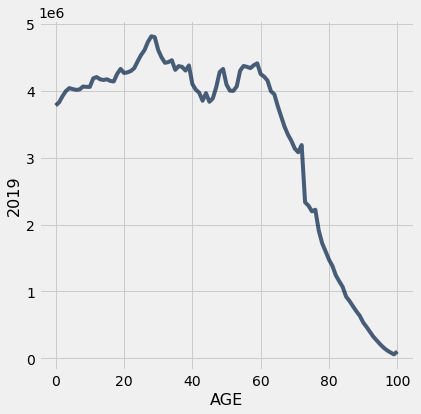

In [10]:
overall.plot('AGE','2019')
print('US Population')


Text(0.5, 1.0, 'US Population')

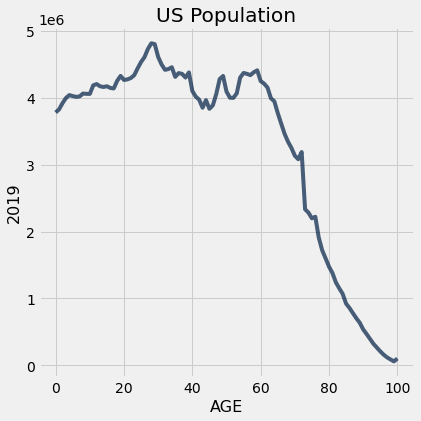

In [11]:
overall.plot('AGE','2019')
plots.title('US Population')

그래프 그리고 있는 것에 plot

## **Males vs Females**

In [12]:
males=no_999.where('SEX',1).drop('SEX')
females=no_999.where('SEX',2).drop('SEX')


In [13]:
pop_2019=Table().with_columns(
    'Age',males.column('AGE'),
    'Males',males.column('2019'),
    'Females',females.column('2019')
)
pop_2019.show(5)

Age,Males,Females
0,1935117,1847935
1,1958585,1871014
2,2005544,1916500
3,2043010,1955655
4,2066951,1976372


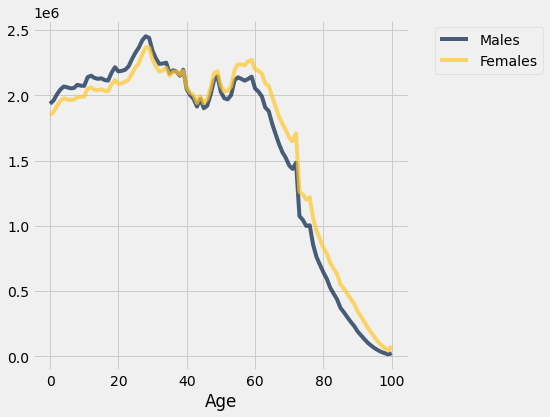

In [14]:
pop_2019.plot('Age')

괄호 안에 넣은 것을 x 축으로 하고 나머지 것들을 알아서 그려줌

In [15]:
pop_2019.column('Males')

array([1935117, 1958585, 2005544, 2043010, 2066951, 2061200, 2052956,
       2055735, 2079723, 2073148, 2071778, 2138037, 2149819, 2132987,
       2125640, 2129720, 2116165, 2112553, 2172385, 2214784, 2183139,
       2187086, 2195296, 2221758, 2277473, 2325853, 2365886, 2421270,
       2451756, 2439805, 2340865, 2281327, 2239886, 2243280, 2249252,
       2167622, 2191368, 2181162, 2149359, 2195430, 2046663, 2001502,
       1972584, 1913289, 1973101, 1900492, 1919298, 2005221, 2114614,
       2145730, 2025376, 1976883, 1968619, 2001325, 2114408, 2137586,
       2125123, 2111795, 2125774, 2142211, 2052677, 2027951, 1991220,
       1905842, 1879040, 1783428, 1703888, 1627863, 1564129, 1520465,
       1462120, 1435378, 1483236, 1074771, 1044301,  998390, 1003690,
        854930,  760170,  701319,  643638,  593628,  525766,  480165,
        436527,  371082,  337306,  299845,  264191,  232649,  191220,
        160941,  131684,  103415,   81893,   61994,   46046,   32611,
         23543,   14

In [16]:
total=pop_2019.column('Males') + pop_2019.column('Females')
pct_female=pop_2019.column('Females')/total * 100
pct_female

array([ 48.84772929,  48.85665575,  48.86482661,  48.90769794,
        48.87989409,  48.83177216,  48.89619133,  48.891796  ,
        48.85332574,  48.96079987,  48.98279709,  48.9638626 ,
        48.91584353,  48.91319525,  48.95759569,  48.99435008,
        49.0132324 ,  49.00202176,  48.95504446,  48.85543937,
        48.86882703,  48.87982978,  48.93202059,  48.82680386,
        48.75770556,  48.75912579,  48.69284051,  48.8521968 ,
        49.12023409,  49.23570746,  49.27026013,  49.32986637,
        49.3410954 ,  49.39558621,  49.56983336,  49.77550276,
        49.88230838,  49.98809984,  50.07964091,  49.90289454,
        50.14599374,  50.21453868,  50.37201166,  50.35627549,
        50.26558532,  50.48105622,  50.6527532 ,  50.58644103,
        50.62378332,  50.44245948,  50.55924807,  50.63152682,
        50.80644073,  50.81350976,  50.89171017,  51.13603295,
        51.27000222,  51.3678543 ,  51.52798838,  51.46621264,
        51.73196183,  51.88924675,  52.0955001 ,  52.30

In [17]:
pop_2019=pop_2019.with_column('Percent female',pct_female)
pop_2019

Age,Males,Females,Percent female
0,1935117,1847935,48.8477
1,1958585,1871014,48.8567
2,2005544,1916500,48.8648
3,2043010,1955655,48.9077
4,2066951,1976372,48.8799
5,2061200,1967081,48.8318
6,2052956,1964271,48.8962
7,2055735,1966584,48.8918
8,2079723,1986471,48.8533
9,2073148,1988726,48.9608


with column : 새로운 열 만들음

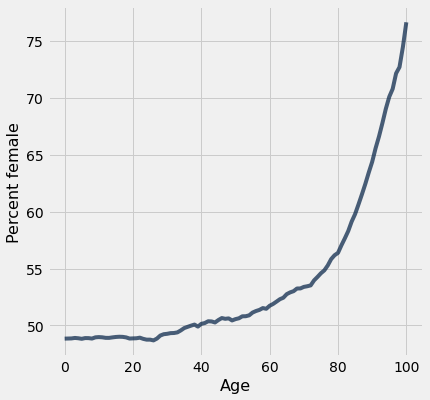

In [18]:
pop_2019.plot('Age','Percent female')

plot에 뒷부분을 안 주면 y축에는 아무 요소나
이 그래프에서 시작점ㅇ ㅣ0이 아니라 50으로 돼있으니까 왜곡이 있을 수 있다

AttributeError: ignored

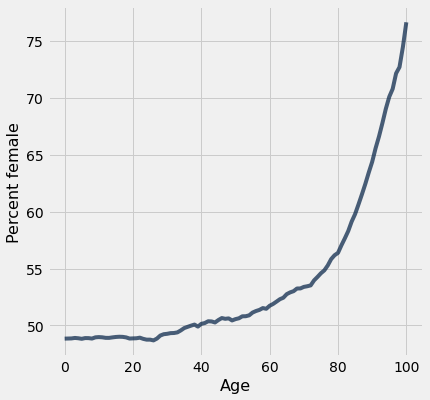

In [19]:
pop_2019.plot('Age','Percent female')
plots.ylm(0,100)

## **Scatter Plots**

In [21]:
actors = Table.read_table('actors.csv')
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4


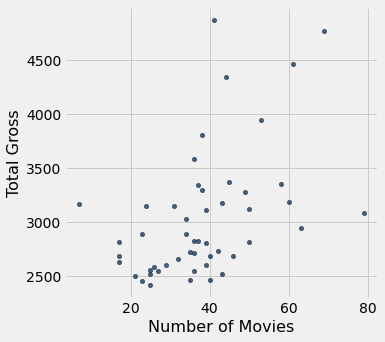

In [22]:
actors.scatter('Number of Movies','Total Gross')

x,y 축의 두 특성들에 대해 어떤 관계가 있는지를 보여주는 scatter

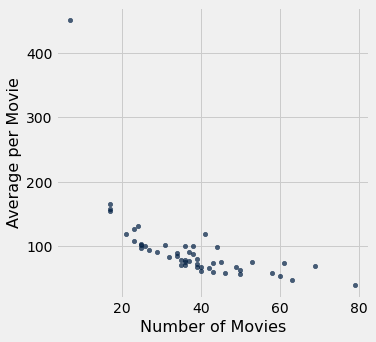

In [23]:
actors.scatter('Number of Movies','Average per Movie')

두 그래프의 해석 결과, *다작일수록* 평균 수익은 내려가는 것을 볼 수 있음

In [24]:
actors.where('Average per Movie',are.above(400))

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


바로 위의 그래프에서 400을 넘는 사람 알고싶을 때 쓰는 코드

## Cargegorical Data

In [25]:
Table().with_columns(
    'Flavor', make_array('Chocolate', 'Strawberry', 'Vanilla'),
    'Number of Cartons', make_array(16, 5, 9)
)

Flavor,Number of Cartons
Chocolate,16
Strawberry,5
Vanilla,9


## Bar Charts

In [27]:
top_movies = Table.read_table('top_movies_2017.csv')

NameError: ignored